## Data wrangling

| Column Name | Description                                                                                                                                                                              | Data Format         | Handling Missing Data                                                                        | feature engineering                                             |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------- | -------------------------------------------------------------------------------------------- | --------------------------------------------------------------- |
| STATE       |                                                                                                                                                                                          | categorical         | done                                                                                         | create democratic/republican and four regions for visualization |
| PHYSHLTH    | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                        | numeric             | impute 77, 99, BLANK with median of remaining values (1-30)<br>impute 88 with 0              |                                                                 |
| MENTHLTH    | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?         | numeric             | impute 77, 99, BLANK with median of remaining values (1-30)<br>impute 88 with 0              |                                                                 |
| ASTHMA3     | (Ever told) (you had) asthma?                                                                                                                                                            | categorical         | done                                                                                         |                                                                 |
| HAVARTH5    | Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?                                  | categorical         | let BLANK be another category                                                                |                                                                 |
| _MICHD      | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                                    | categorical         | let BLANK be another category                                                                |                                                                 |
| _PRACE1     | Preferred race category                                                                                                                                                                  | categorical         | combine 77, 99, BLANK into one category                                                      | Replaced 99 and blank with 77. Done                             |
| _HISPANC    | Hispanic, Latino/a, or Spanish                                                                                                                                                           | categorical         | done                                                                                         | Done                                                            |
| _SEX        | Male, Female                                                                                                                                                                             | categorical         | done                                                                                         | Done                                                            |
| _AGEG5YR    | age grouped by 5 year                                                                                                                                                                    | ordered categorical | Drop 14 because note says 7 <= AGE <= 9 and we think some young children might be responding | Done                                                            |
| _EDUCAG     | Level of education completed                                                                                                                                                             | ordered categorical | Impute 9 with median                                                                         | Done                                                            |
| INCOME3     | Is your annual household income from all sources:                                                                                                                                        | ordered categorical | Impute 77, 99, BLANK with median                                                             | Replaced blank with 77, impute median. Done                     |
| HTIN4       | Reported height in inches                                                                                                                                                                | numeric             | Impute BLANK with median                                                                |                                                                 |
| RENTHOM1    | Rent or Own home                                                                                                                                                                         | categorical         | combine 7, 9, BLANK into one category                                                        |                                                                 |
| PRIMINSR    | What is the current primary source of your health insurance?                                                                                                                             | categorical         | combine 77, 99, BLANK into one category                                                      |                                                                 |
| EXERANY2    | During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? | categorical         | combine 7, 9, BLANK into one category                                                        |                                                                 |
| _CHLDCNT    | Number of children in household                                                                                                                                                          | ordered categorical | Impute 9 with median                                                                         |                                                                 |
| _DRNKWK1    | Total number of alcoholic beverages consumed per week                                                                                                                                    | numeric             | Impute 99900 with median or round average                                                    |                                                                 |
| FTJUDA2_    | Fruit juice intake in times per day                                                                                                                                                      | numeric             | Impute BLANK with median                                                                |                                                                 |
| FRUTDA2_    | Fruit intake in times per day                                                                                                                                                            | numeric             | Impute BLANK with median                                                                |                                                                 |
| GRENDA1_    | Dark green vegetable intake in times per day                                                                                                                                             | numeric             | Impute BLANK with median                                                                |                                                                 |
| FRNCHDA_    | French Fry intake in times per day                                                                                                                                                       | numeric             | Impute BLANK with median                                                                |                                                                 |
| POTADA1_    | Potato servings per day                                                                                                                                                                  | numeric             | Impute BLANK with median                                                                |                                                                 |
| VEGEDA2_    | Other vegetable intake in times per day                                                                                                                                                  | numeric             | Impute BLANK with median                                                                |                                                                 |
| _BMI5       | Body Mass Index (BMI)                                                                                                                                                                    | numeric             | remove BLANK                                                                                 |                                                                 |
| _BMI5CAT    | "Underweight", 'Normal Weight', 'Overweight', 'Obese'                                                                                                                                    | categorical         | remove BLANK                                                                                 |                                                                 |

### Load survey data

STEPS:
1. Drop _AGEG5YR == 14 & _BMI5 is null & _BMI5CAT is null
2. Subset data to the columns you were assigned + the two purple BMI ones.
3. Handle missing data in your columns according to column E ([link](https://docs.google.com/spreadsheets/d/1vi9AastNMsGhh6_oqqyNZ0E03umcUtkz-fSjITP0_to/edit#gid=703849429)).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [23]:
df = pd.read_csv("llcp2021.csv", 
                        usecols = [ '_BMI5', '_BMI5CAT','_AGEG5YR', 
                                   'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', '_STATE', 
                                   '_PRACE1','_HISPANC','_SEX','_EDUCAG','INCOME3', 
                                    '_DRNKWK1', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_',
                                    'RENTHOM1', 'PRIMINSR', 'EXERANY2','HTIN4', '_CHLDCNT'])
df = df.dropna(subset=['_BMI5', '_BMI5CAT'])
df = df[df['_AGEG5YR'] != 14]
print(df.shape)
df.head()


(387021, 26)


,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,5.0,2.0,...,1.0,1.0,2.0,0.0,0.0,100.0,57.0,43.0,14.0,100.0
2,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,...,3.0,1.0,2.0,0.0,0.0,100.0,0.0,14.0,14.0,43.0
3,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,7.0,2.0,...,4.0,1.0,2.0,300.0,71.0,43.0,10.0,57.0,27.0,71.0
4,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,4.0,1.0,...,3.0,1.0,1.0,0.0,0.0,100.0,100.0,29.0,29.0,100.0
5,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,6.0,2.0,...,2.0,1.0,3.0,0.0,0.0,29.0,14.0,0.0,14.0,14.0


In [24]:
df.describe()


,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,387015.000000,383296.000000,...,387021.000000,387021.000000,387021.000000,387021.000000,361865.000000,362698.000000,362110.000000,361626.000000,358516.000000,358373.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,20.597845,1.915614,...,3.010183,1.536043,3.053529,4656.688598,44.453636,132.418224,77.203358,25.734466,28.631032,136.721837
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,31.118084,0.277967,...,0.833211,1.124849,0.981444,20396.221942,362.615610,491.084071,450.616948,169.407400,177.885293,634.293990
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,2.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,43.000000,14.000000,3.000000,7.000000,43.000000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000,...,3.000000,1.000000,3.000000,23.000000,3.000000,100.000000,43.000000,14.000000,14.000000,86.000000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,4.000000,2.000000,4.000000,350.000000,33.000000,100.000000,71.000000,29.000000,29.000000,100.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.000000,...,4.000000,9.000000,9.000000,99900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000


### Lauren's changes

In [25]:
cols = ['HTIN4', '_CHLDCNT', '_DRNKWK1', 'FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_BMI5', '_BMI5CAT'] # edit this list to include all the relevant columns

two_implied_decimals = ['FTJUDA2_', 'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_BMI5']

to_replace_dict = {'_CHLDCNT': 9, '_DRNKWK1': 99900, 'FTJUDA2_': 9900, 'FRUTDA2_': 9900, 'GRENDA1_': 9900, 'FRNCHDA_': 9900, 'POTADA1_': 9900, 'VEGEDA2_': 9900}
# CLEANING NUMERIC COLUMNS
for col in cols:
    if col in to_replace_dict:
        df[col] = df[col].replace(to_replace=to_replace_dict[col]) # replace certain values with None
    df[col] = df[col].fillna(df[col].median()) # impute None values with mean
    if col in two_implied_decimals:
        df[col] /= 100 # divide by 100 (bc 2 implied decimal places)

In [26]:
df.describe()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,INCOME3,_MICHD,...,_BMI5CAT,_CHLDCNT,_EDUCAG,_DRNKWK1,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,387015.000000,383296.000000,...,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000,387021.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,20.597845,1.915614,...,3.010183,1.496671,3.053529,297.278907,0.307158,1.101911,0.575434,0.227694,0.251054,0.978556
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,31.118084,0.277967,...,0.833211,0.987317,0.981444,901.862981,1.182941,1.689076,1.350386,0.717675,0.717338,1.712293
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,2.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,0.430000,0.140000,0.070000,0.070000,0.430000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,7.000000,2.000000,...,3.000000,1.000000,3.000000,23.000000,0.030000,1.000000,0.430000,0.140000,0.140000,0.860000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,4.000000,2.000000,4.000000,280.000000,0.290000,1.000000,0.710000,0.290000,0.290000,1.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,2.000000,...,4.000000,6.000000,9.000000,53200.000000,98.000000,98.000000,98.000000,98.000000,89.000000,92.000000


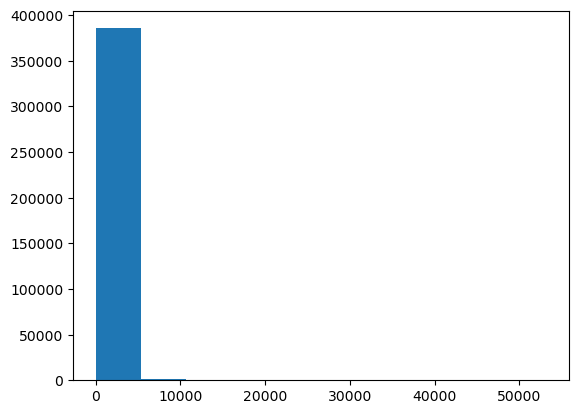

In [27]:
plt.hist(df['_DRNKWK1'])
plt.show() 


### Doma's changes

- Collect state related attributes (party affiliation, region and division)
    - FIPS code to state names and abbreviation [link](https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm)
    - State region and division [link](https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv)
    - State's party affiliation [link](https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/)

- Merge above three files into one 
    - `State_attributes.csv` [link](https://drive.google.com/file/d/117yTpjT3GFYgKAFM3HJHl67DaZToTQMU/view?usp=drive_link)
-  Detail in `Doma_EDA.ipynb` [link](https://github.com/laurenc8/ds4a-obesity)

#### Add states' attributes

In [28]:
state_df = pd.read_csv("State_attributes.csv")
state_df.head()

,State_name,State_abb,_STATE,Republican,No_lean,Democrat,Region,Division
0,Alabama,AL,1,0.52,0.13,0.35,South,East South Central
1,Alaska,AK,2,0.39,0.29,0.32,West,Pacific
2,Arizona,AZ,4,0.40,0.21,0.39,West,Mountain
3,Arkansas,AR,5,0.46,0.16,0.38,South,West South Central
4,California,CA,6,0.30,0.21,0.49,West,Pacific


In [29]:
state_df.describe()

,_STATE,Republican,No_lean,Democrat
count,53.000000,53.000000,53.000000,53.000000
mean,30.698113,0.392075,0.177925,0.430000
std,17.883797,0.082866,0.030719,0.082299
min,1.000000,0.110000,0.100000,0.250000
25%,17.000000,0.330000,0.160000,0.390000
50%,30.000000,0.400000,0.180000,0.430000
75%,44.000000,0.440000,0.190000,0.470000
max,78.000000,0.570000,0.290000,0.730000


In [30]:
df = df.merge(state_df, on = "_STATE")

In [31]:
df.drop(columns=["State_name", "State_abb","_STATE"], inplace=True)

#### Fill in missing data and convert numeric values to strings where needed

In [32]:
# PHYSHLTH: Number of days without good physical health within past 30 days
# MENTHLTH: Number of days without good mental health within past 30 days

def replace_PHS_MEN_median(df_name, colnames):
    for colname in colnames:
        med_30less = df_name[df_name[colname]<= 30][[colname]].median()
        print(med_30less)

        df_name[colname].fillna(med_30less, inplace = True)
        #replace None with 0
        df_name.replace({colname: { np.nan:med_30less, 77:med_30less,  88:0, 99:med_30less}}, inplace = True)
    return df_name

df = replace_PHS_MEN_median(df, ['PHYSHLTH', 'MENTHLTH'])


PHYSHLTH    6.0
dtype: float64
MENTHLTH    7.0
dtype: float64


In [33]:
# ASTHMA3: Ever told) (you had) asthma
# HAVARTH5: Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia? 
# _MICHD: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

def create_str_cat(df_name, colnames):
    for colname in colnames:
        print(colname)
        print(df_name[colname].unique())
        df_name[colname].fillna('BLANK', inplace = True)
        df_name.replace({colname: {1:'Yes',  2:'No', 7:'Not Sure', 9:'Refused', np.nan:'BLANK'}}, inplace = True)
        print(df_name[colname].unique())
    return df_name

df = create_str_cat(df, ['ASTHMA3', '_MICHD', 'HAVARTH5'])

ASTHMA3
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']
_MICHD
[ 2.  1. nan]
['No' 'Yes' 'BLANK']
HAVARTH5
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']


In [34]:
# RENTHOM1: Rent or Own home
print(df['RENTHOM1'].unique())
df['RENTHOM1'].fillna('BLANK', inplace = True)
df.replace({'RENTHOM1': {1:'Own',  2:'Rent', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(df['RENTHOM1'].unique())


[1. 3. 2. 9. 7.]
['Own' 'Other' 'Rent' 'BLANK']


In [35]:
# PRIMINSR: Primary Insurance
df['PRIMINSR'].fillna('BLANK', inplace = True)
df.replace({'PRIMINSR': {1:'Employer',  2:'Private', 3:'Medicare', 4:'Medigap',  5:'Medicaid', 6:'Children Health Insurance Program', 7:'Military', 8:'Indian Health Service', 9:'State sponsored', 10:'Other government',  88:'No coverage', 77:'BLANK', 99:'BLANK', np.nan:'BLANK'}}, inplace = True)
print(df['PRIMINSR'].unique())

['Medicare' 'Private' 'Employer' 'BLANK' 'No coverage' 'Medicaid'
 'Military' 'Other government' 'State sponsored' 'Medigap'
 'Indian Health Service' 'Children Health Insurance Program']


In [36]:
# EXERANY2: Exercise in Past 30 Days 
print(df['EXERANY2'].unique())
df['EXERANY2'].fillna('BLANK', inplace = True)
df.replace({'EXERANY2': {1:'Yes',  2:'No', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(df['EXERANY2'].unique())

[2. 1. 7. 9.]
['No' 'Yes' 'BLANK']


### Tanisha's changes

In [37]:

df = df[df["_EDUCAG"] != 9]
df = df[(df["INCOME3"] != 77) & (df["INCOME3"] != 99)]
df = df[(df["_PRACE1"] != 77) & (df["_PRACE1"] != 99)]
df = df[df["_HISPANC"] != 9]

print(df.shape)

(312401, 30)


In [38]:
df.replace({'_PRACE1': {1:'White', 
                               2:'Black or African American', 
                               3:'American Indian or Alaskan Native', 
                               4:'Asian',
                               5:'Native Hawaiian or other Pacific Islander',
                               6:'Other race',
                               7:'No preferred race', 
                               8:'Multiracial but preferred race not answered'},
                '_HISPANC':{1:'Hispanic, Latino/a, or Spanish origin', 
                            2:'Not of Hispanic, Latino/a, or Spanish origin'}, 
                '_SEX':{1:'Male', 
                        2:'Female'}, 
                '_AGEG5YR':{1:'Age 18 to 24', 
                            2:'Age 25 to 29', 
                            3:'Age 30 to 34', 
                            4:'Age 35 to 39',
                            5:'Age 40 to 44', 
                            6:'Age 45 to 49',
                            7:'Age 50 to 54', 
                            8:'Age 55 to 59',
                            9:'Age 60 to 64', 
                            10:'Age 65 to 69', 
                            11:'Age 70 to 74', 
                            12:'Age 75 to 79', 
                            13:'Age 80 or older'}, 
                '_EDUCAG':{1:'Did not graduate High School', 
                           2:'Graduated High School', 
                           3:'Attended College or Technical School', 
                           4:'Graduated from College or Technical School'},
                'INCOME3': {1:"Less than $10,000", 
                            2:"$10,000 to < $15,000",
                            3:"$15,000 to < $20,000", 
                            4:"$20,000 to < $25,000", 
                            5:"$25,000 to < $35,000", 
                            6:"$35,000 to < $50,000", 
                            7:"$50,000 to < $75,000", 
                            8:"$75,000 to < $100,000", 
                            9:"$100,000 to < $150,000", 
                            10:"$150,000 to < $200,000",
                            11:"$200,000 or more"}},
                inplace = True)
                       
#check if any columns with nan left 
df.columns[df.isna().any()].tolist()

['INCOME3']

In [39]:
# check if all data types are converted correctly for model
pd.DataFrame(df.dtypes)

,0
PHYSHLTH,float64
MENTHLTH,float64
PRIMINSR,object
EXERANY2,object
ASTHMA3,object
HAVARTH5,object
RENTHOM1,object
INCOME3,object
_MICHD,object
_PRACE1,object


# Predictive Model 

**Notes:** 
- create train/test set if not hypertuning otherwie train/validation/test set
- Some of the columns are ordered categories, so make sure you utilize the ordering if your model allows it
    - _BMI5CAT
    - _AGEG5YR
    - _EDUCAG
    - INCOME3

**Tasks**

- (Lauren) linear regression (predict BMI)
- (Tanisha) logistic regression (predict category)
- (Pakize) random forest regression/ categorical 
- (Doma) XGBoost regression/ categorical 






# Random Forest Model

In [2]:
import pandas as pd


from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

import pickle

import seaborn as sns

In [3]:
df = pd.read_csv('clean_llcp2021.csv')

# Drop misc. values
df = df[(df['EXERANY2'] != 'BLANK')
      & (df['ASTHMA3'] != 'Not Sure') & (df['ASTHMA3'] != 'Refused')
      & (df['HAVARTH5'] != 'Not Sure') & (df['HAVARTH5'] != 'Refused')
      & (df['RENTHOM1'] != 'BLANK')
      & (df['_MICHD'] != 'BLANK')
      & (df['PRIMINSR'] != 'BLANK')]

df.drop(columns = 'Division', inplace = True)

In [4]:
# Binary Encoding: 'EXERANY2', 'ASTHMA3', 'HAVARTH5', '_MICHD', '_HISPANC', '_SEX'
for col in ['EXERANY2', 'ASTHMA3', 'HAVARTH5', '_MICHD']:
    df[col] = df[col].eq('Yes').mul(1)
df['_HISPANC'] = df['_HISPANC'].eq('Hispanic, Latino/a, or Spanish origin').mul(1)
df['_SEX'] = df['_SEX'].eq('Female').mul(1)
# One Hot Encoding: 'PRIMINSR', 'RENTHOM1', '_PRACE1', 'Region'
df = pd.get_dummies(df, columns = ['PRIMINSR', 'RENTHOM1', '_PRACE1', 'Region'])
# Ordinal Encoding: 'INCOME3', '_AGEG5YR', '_EDUCAG'
enc = OrdinalEncoder(categories=[['Less than $10,000',
                                  '$10,000 to < $15,000',
                                  '$15,000 to < $20,000',
                                  '$20,000 to < $25,000',
                                  '$25,000 to < $35,000',
                                  '$35,000 to < $50,000',
                                  '$50,000 to < $75,000',
                                  '$75,000 to < $100,000',
                                  '$100,000 to < $150,000',
                                  '$150,000 to < $200,000',
                                  '$200,000 or more']])
enc.fit(pd.DataFrame(df['INCOME3']))
df['INCOME3'] = enc.transform(pd.DataFrame(df['INCOME3']))
enc = OrdinalEncoder(categories=[['Age 18 to 24',
                                  'Age 25 to 29',
                                  'Age 30 to 34',
                                  'Age 35 to 39',
                                  'Age 40 to 44',
                                  'Age 45 to 49',
                                  'Age 50 to 54',
                                  'Age 55 to 59',
                                  'Age 60 to 64',
                                  'Age 65 to 69',
                                  'Age 70 to 74',
                                  'Age 75 to 79',
                                  'Age 80 or older']])
enc.fit(pd.DataFrame(df['_AGEG5YR']))
df['_AGEG5YR'] = enc.transform(pd.DataFrame(df['_AGEG5YR']))
enc = OrdinalEncoder(categories=[['Did not graduate High School',
                                  'Graduated High School',
                                  'Attended College or Technical School',
                                  'Graduated from College or Technical School']])
enc.fit(pd.DataFrame(df['_EDUCAG']))
df['_EDUCAG'] = enc.transform(pd.DataFrame(df['_EDUCAG']))

In [5]:
def get_cm_plot(actual_y, predicted_y, labels, plot_title):
    cm = metrics.confusion_matrix(actual_y, predicted_y, labels = labels)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix {plot_title}')
    ax.xaxis.set_ticklabels(['Underweight', 'Overweight', 'Obese', 'Normal Weight'])
    ax.yaxis.set_ticklabels(['Underweight', 'Overweight', 'Obese', 'Normal Weight'])

def plot_feature_imp(model, type_model):
    feature_names = df.drop(columns=["_BMI5", "_BMI5CAT"]).columns
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

    forest_importances = pd.Series(importances, index=feature_names)

    indices = np.argsort(forest_importances)
    plt.figure(figsize=(8,12))
    plt.title(f'Feature Importances {type_model}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def rename_features(X_df):
    X_df = X_df.rename(columns={"PHYSHLTH": "Physical Health",
                            "MENTHLTH": "Mental Health",
                            "EXERANY2": "Exercise",
                            "ASTHMA3": "Asthma",
                            "HAVARTH5": "Arthritis",
                            "INCOME3": "Income",
                            "_MICHD": "Heart Attack",
                            "_HISPANC": "Hispanic",
                            "_SEX": "Sex",
                            "_AGEG5YR": "Age",
                            "_BMI5": "BMI",
                            "_CHLDCNT": "Number of Children",
                            "_EDUCAG": "Education",
                            "_DRNKWK1": "Alcohol Consumption",
                            "FTJUDA2_": "Fruit Juice Intake",
                            "FRUTDA2_": "Fruit Intake",
                            "GRENDA1_": "Dark Green Vegetable Intake",
                            "FRNCHDA_": "French Fry Intake",
                            "POTADA1_": "Potato Intake",
                            "VEGEDA2_": "Other Vegetable Intake",
                            "No_lean": "No Lean",
                            'PRIMINSR_Children Health Insurance Program': "Health Insurance: CHIP",
                            'PRIMINSR_Employer': "Health Insurance: Employer",
                            'PRIMINSR_Indian Health Service': "Health Insurance: Indian Health Service",
                            'PRIMINSR_Medicaid': "Health Insurance: Medicaid",
                            'PRIMINSR_Medicare': "Health Insurance: Medicare",
                            'PRIMINSR_Medigap': "Health Insurance: Medigap",
                            'PRIMINSR_Military': "Health Insurance: Military",
                            'PRIMINSR_No coverage': "Health Insurance: No Coverage",
                            'PRIMINSR_Other government': "Health Insurance: Other Govt Program",
                            'PRIMINSR_Private': "Health Insurance: Private",
                            'PRIMINSR_State sponsored': "Health Insurance: State-Sponsored",
                            'RENTHOM1_Other': "Rent Home: Other",
                            'RENTHOM1_Own': "Rent Home: Own",
                            'RENTHOM1_Rent': "Rent Home: Rent",
                            '_PRACE1_American Indian or Alaskan Native': "Race: American Indian or Alaskan Native",
                            '_PRACE1_Asian': "Race: Asian",
                            '_PRACE1_Black or African American': "Race: Black or African American",
                            '_PRACE1_Multiracial but preferred race not answered': "Race: Multiracial",
                            '_PRACE1_Native Hawaiian or other Pacific Islander': "Race: Pacific Islander",
                            '_PRACE1_No preferred race': "Race: No Preferred",
                            '_PRACE1_Other race': "Race: Other",
                            '_PRACE1_White': "Race: White",
                            'Region_Midwest': "Region: Midwest",
                            'Region_Northeast': "Region: Northeast",
                            'Region_Puerto Rico': "Region: Puerto Rico",
                            'Region_South': "Region: South",
                            'Region_Virgin Islands': "Region: Virgin Islands",
                            'Region_West': "Region: West"})
    return X_df


def get_sensitivity(actual_y, predicted_y):
    cm = metrics.confusion_matrix(actual_y, predicted_y, labels = [1, 2, 3, 4])
    for i in range(len(cm)):
        sum_i = sum(cm[i])
        for j in range(len(cm)):
            if i == j:
                print(i, cm[i][j]/sum_i*100)


def plot_feature_imp_top_n(model, type_model, feature_names, n):
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=feature_names)

    indices = np.argsort(forest_importances)[-n:]

    plt.figure(figsize=(6,8))
    plt.title(f'Feature Importances {type_model}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

### RandomForestRegressor

In [66]:
X, y = df.drop(columns=["_BMI5", "_BMI5CAT"]), df["_BMI5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Train model

In [35]:
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [36]:
# Number of trees
n_estimators = list(np.arange(200, 1200, step=200))
# Number of features considered at every split
max_features = ['sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = list(np.arange(10, 110, step=10))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time= 8.6min
[CV] END bootstrap=True, max_depth=100, max_fe

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [39]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 4.8999 degrees.
Accuracy = 82.65%.
Model Performance
Average Error: 4.5578 degrees.
Accuracy = 83.94%.
Improvement of 1.57%.


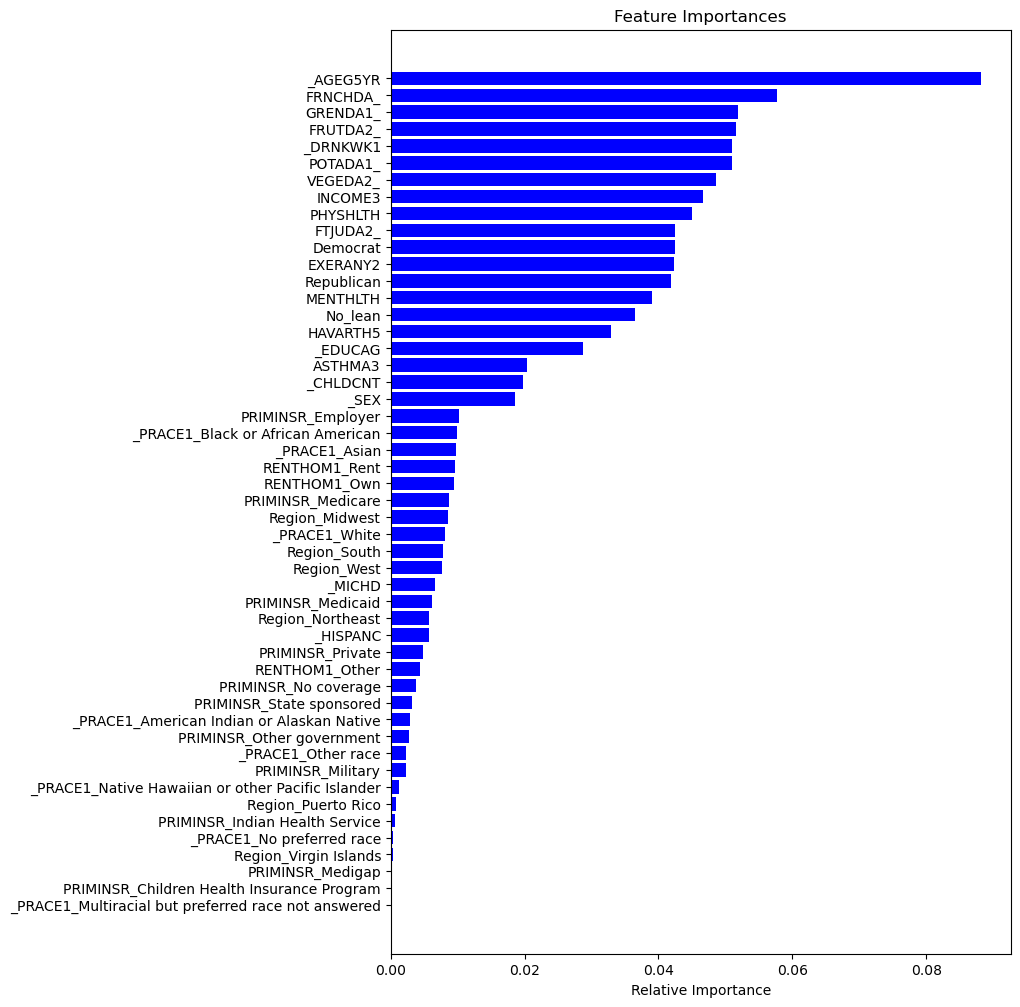

In [53]:
importances = best_random.feature_importances_
# std = np.std([tree.feature_importances_ for tree in best_random.estimators_], axis=0)

feature_names = X_train.columns #[f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

indices = np.argsort(forest_importances)
plt.figure(figsize=(8,12))
plt.title('Feature Importances RandomForestRegresspr')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [54]:
 # Save the model under the cwd
pkl_filename = "rf_best.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_random.best_estimator_, file)

In [55]:
# Save the model under the cwd
pkl_filename = "rf.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_random, file)

In [56]:
# Save the model under the cwd
pkl_filename = "rf_base_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(base_model, file)

 #### Load the best RandomForestRegressor model

 - Build confusion matrix

In [73]:

# Load the model
pkl_filename = "rf_best.pkl"

loaded_model = pickle.load(open(pkl_filename, 'rb'))
y_pred = loaded_model.predict(X_test)

y_pred_cat = y_pred.copy()
y_pred_cat = y_pred_cat*100

y_pred_cat[y_pred_cat < 1850] = 1
y_pred_cat[(y_pred_cat >= 1850) & (y_pred_cat < 2500)] = 2
y_pred_cat[(y_pred_cat >= 2500) & (y_pred_cat < 3000)] = 3
y_pred_cat[(y_pred_cat >= 3000) & (y_pred_cat < 9999)] = 4

y_test_cat = y_test.copy()
y_test_cat = y_test_cat*100

y_test_cat[y_test_cat < 1850] = 1
y_test_cat[(y_test_cat >= 1850) & (y_test_cat < 2500)] = 2
y_test_cat[(y_test_cat >= 2500) & (y_test_cat < 3000)] = 3
y_test_cat[(y_test_cat >= 3000) & (y_test_cat < 9999)] = 4

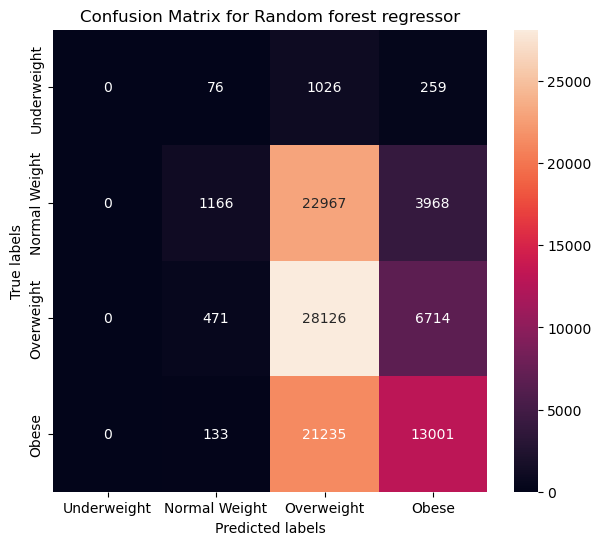

In [75]:
def get_cm_plot(actual_y, predicted_y, plot_title):
    cm = metrics.confusion_matrix(actual_y, predicted_y,  labels = [1, 2, 3, 4])
    fig, ax = plt.subplots(figsize=(7, 6))
 
    # ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {plot_title}')
    ax.xaxis.set_ticklabels(['Underweight', 'Normal Weight', 'Overweight', 'Obese'])
    ax.yaxis.set_ticklabels(['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

get_cm_plot(y_test_cat, y_pred_cat, plot_title = "Random forest regressor")

In [84]:
get_sensitivity(y_test_cat, y_pred_cat)

0 0.0
1 4.149318529589694
2 79.65223301520773
3 37.82769356105793


In [30]:
X_train = rename_features(X_train)

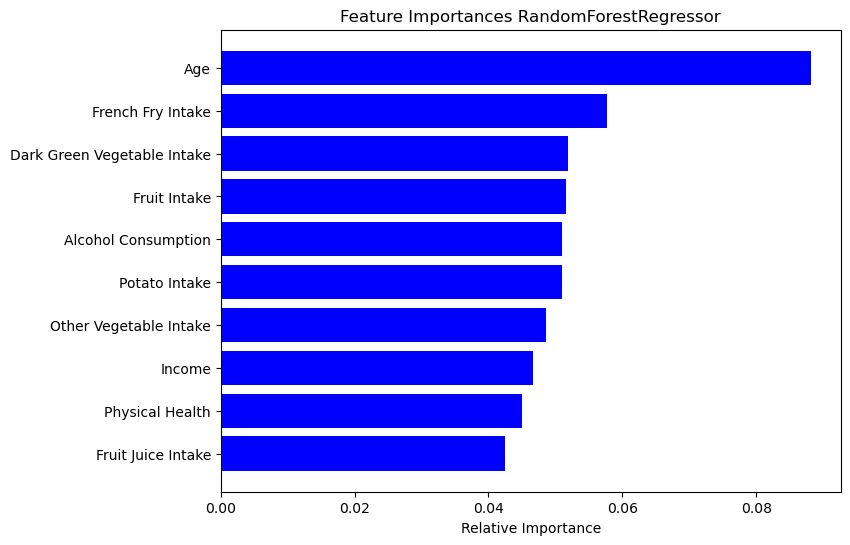

In [31]:
plot_feature_imp_top_n(loaded_model, "RandomForestRegressor", X_train.columns, 10)

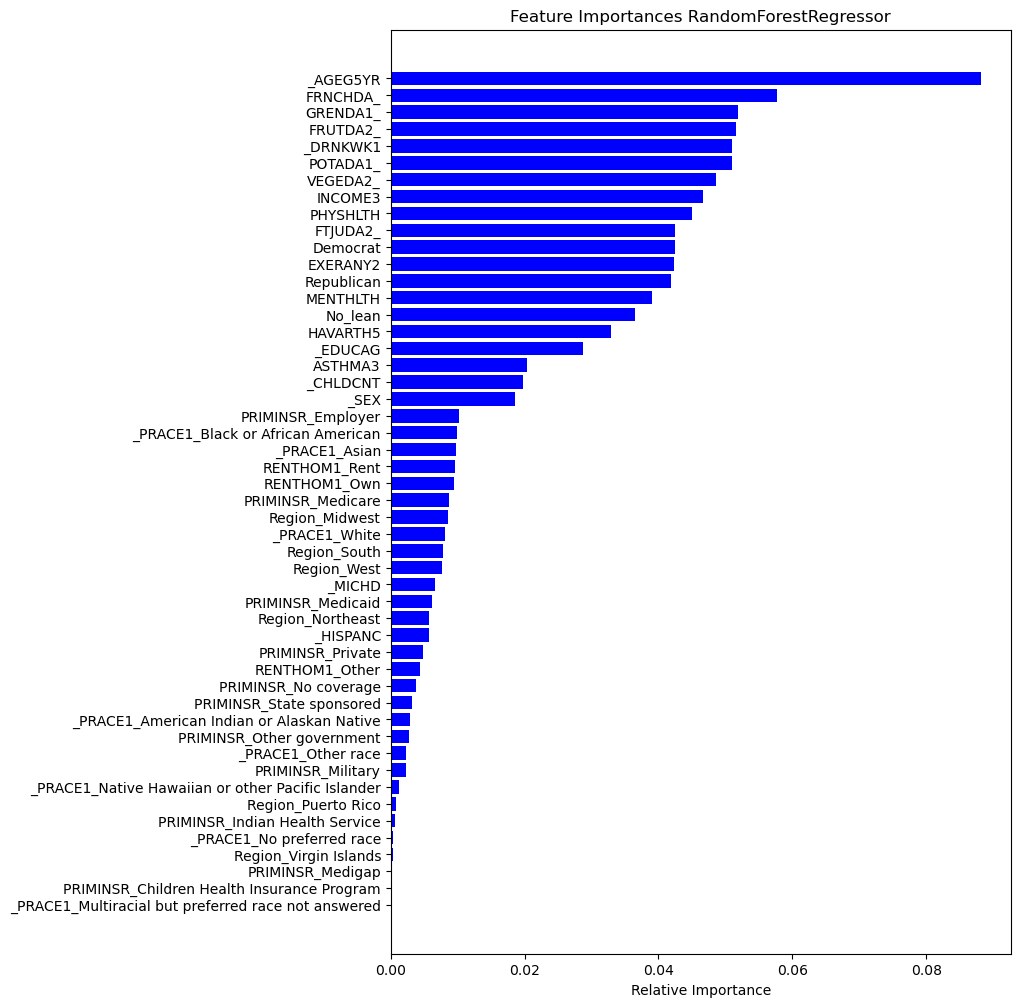

In [22]:
plot_feature_imp(loaded_model, "RandomForestRegressor", X_train.columns)

### RandomForestClassifier

In [6]:
X, y = df.drop(columns=["_BMI5", "_BMI5CAT"]), df["_BMI5CAT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = rename_features(X_train)
X_test = rename_features(X_test)

In [50]:
base_model_classifier = RandomForestClassifier(random_state = 0)
base_model_classifier.fit(X_train, y_train)
y_pred = base_model_classifier.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Model accuracy score: 0.4571
#{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 20}

Model accuracy score: 0.4510


In [54]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(base_model_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


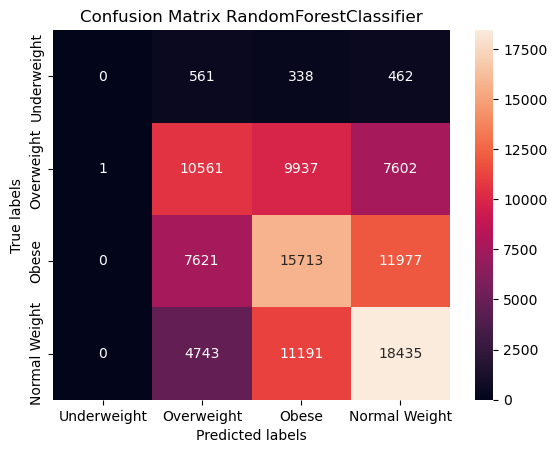

In [64]:
get_cm_plot(y_test, y_pred, labels=base_model_classifier.classes_, plot_title =  "RandomForestClassifier")

In [69]:
get_sensitivity(y_test, y_pred)


0 0.0
1 37.58229244510872
2 44.49888136841211
3 53.638453257295815


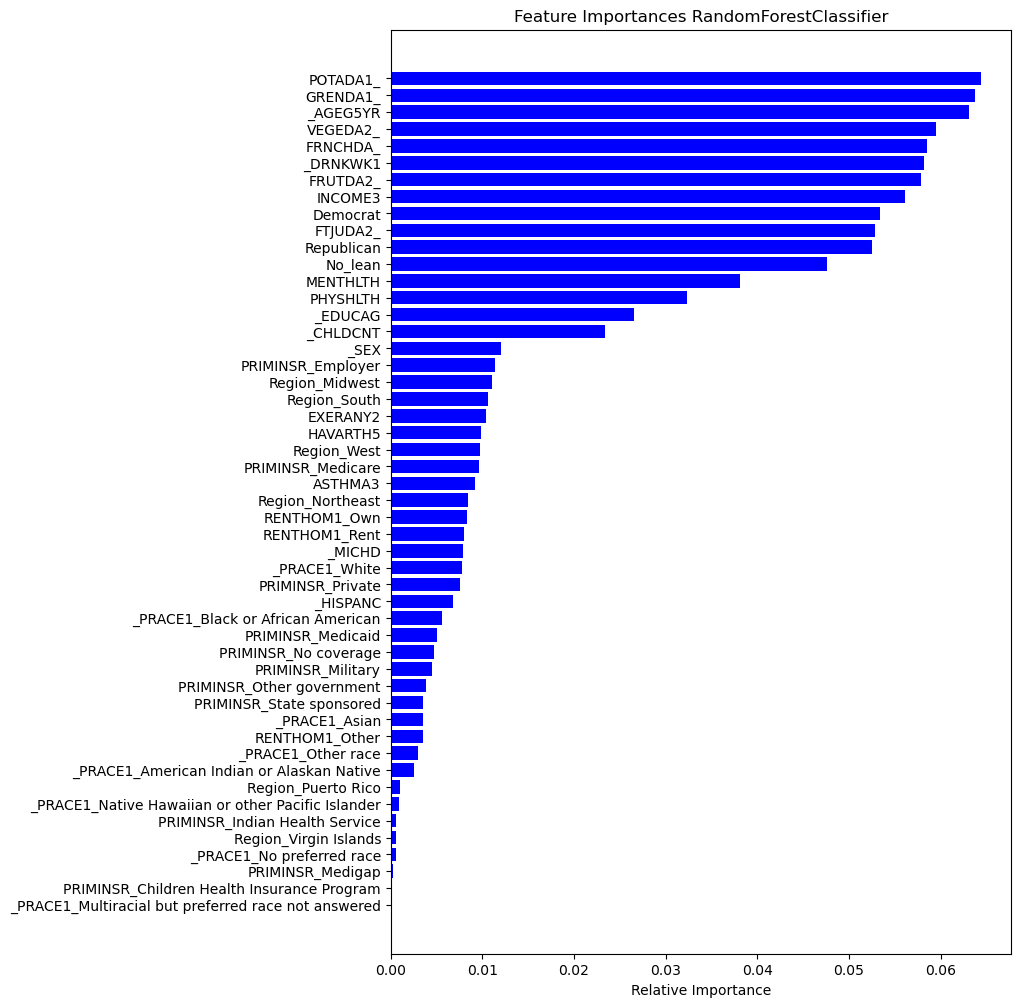

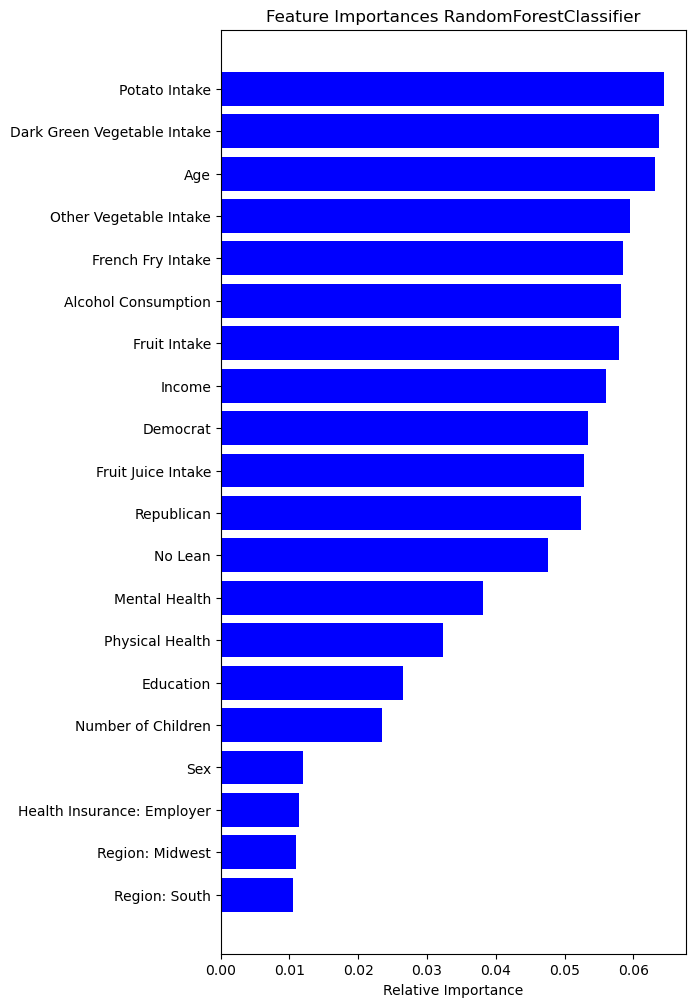

In [76]:
plot_feature_imp(base_model_classifier, "RandomForestClassifier")
def plot_feature_imp_top_n(model, type_model, feature_names, n):
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=feature_names)

    indices = np.argsort(forest_importances)[-n:]

    plt.figure(figsize=(6,12))
    plt.title(f'Feature Importances {type_model}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
plot_feature_imp_top_n(base_model_classifier, "RandomForestClassifier", X_train.columns, 20)

In [63]:
# save model
pkl_filename = "rf_base_model_classifier.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(base_model_classifier, file)

In [7]:
# Load the model
pkl_filename = "rf_base_model_classifier.pkl"

loaded_model = pickle.load(open(pkl_filename, 'rb'))
y_pred = loaded_model.predict(X_test)


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View accuracy score
accuracy_score(y_test, y_pred)

0.4509592301950737

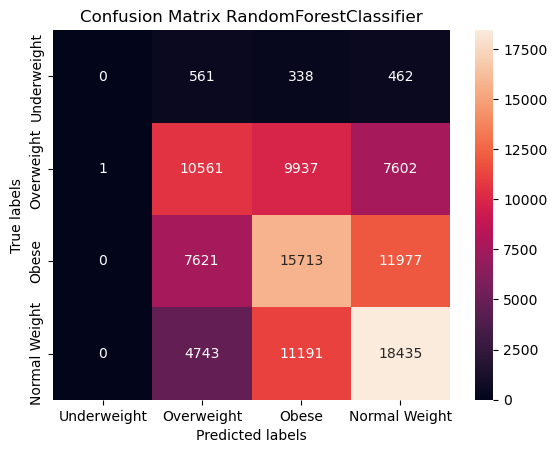

In [71]:
get_cm_plot(y_test, y_pred, labels=loaded_model.classes_, plot_title =  "RandomForestClassifier")

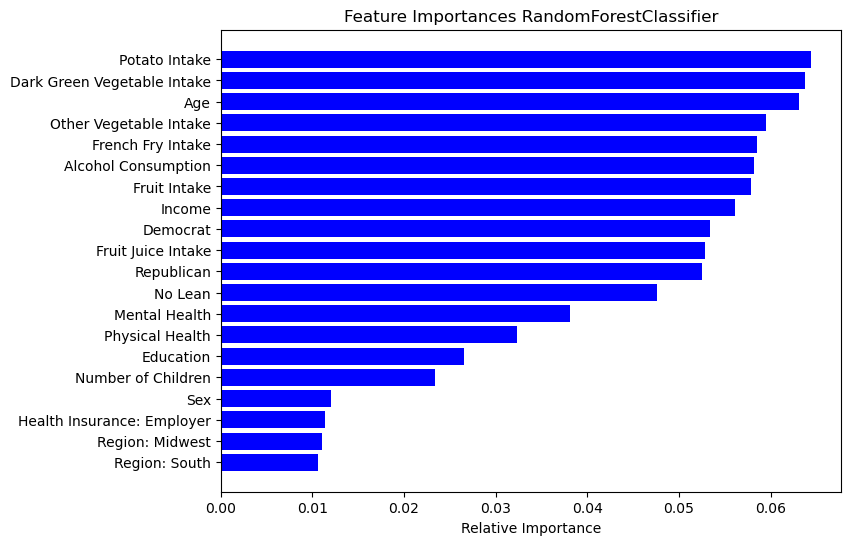

In [74]:
plot_feature_imp_top_n(loaded_model, "RandomForestClassifier", X_train.columns, 20)
